In [1]:
#The name of this project is 'Cryptara' and the objective of this script is to build a Robo-advisor
name = input("Welcome Crypto Investor, what is your name?")

Welcome Crypto Investor, what is your name? jake


In [2]:
if name != "" or name == None:
    # If so, write a print with a string of "Hello" concatenated with the variable `name`.
    print(f"Hello {name}, my name is Cryptara. I make your savings go to good use in the Crypto market..")
    print(f"Tell me, do you have a csv file to upload or would you rather manually input your crypto tickers below?")
    print('')
    data_source=input("type: import or input")
    investment_value=input("how much would you like to invest?")
    print('')
    print(f'Once I have your list, This process starts automatically..')
    print(f'I use data from the TradingView API and filter your list, then I apply a built-in technical analysis function to determine which cryptos are good picks at this point in time')
    print(f"Then, I run hundreds of simulations to determine optimal weights for each crypto selection")
    print(f"From there, I will scan multiple exchanges to determine where you could get the most volume for the dollar at that particular time '(based on cross-exchange rates)'")
    print(f"Lastly, I will present to you an interactive Dashboard based on future projections..")

Hello jake, my name is Cryptara. I make your savings go to good use in the Crypto market..
Tell me, do you have a csv file to upload or would you rather manually input your crypto tickers below?



type: import or input def
how much would you like to invest? df



Once I have your list, This process starts automatically..
I use data from the TradingView API and filter your list, then I apply a built-in technical analysis function to determine which cryptos are good picks at this point in time
Then, I run hundreds of simulations to determine optimal weights for each crypto selection
From there, I will scan multiple exchanges to determine where you could get the most volume for the dollar at that particular time '(based on cross-exchange rates)'
Lastly, I will present to you an interactive Dashboard based on future projections..


In [3]:
if data_source == 'input':
    ticker_1=input("Tell me the first ticker")
    ticker_2=input("Tell me the second ticker")
    ticker_3=input("Tell me the third ticker")
    ticker_4=input("Tell me the fourth ticker")
#OPEN define input option, user can either import csv file or input their tickers directly.
#Let user insert their tickers for the week:
#print(f"Tell me {name}, what are your favoriate cryptos this week?")
#crypto_one = (input("enter the ticker of your first choice:"))
#crypto_two = input("enter the ticker of your second choice:")
print(f'Thanks for using our csv file import option! Let me look through your list and see if I can validate the data..')
#OR USE LIST IMPORT
#ticker_data = Path("../crypto_thirtysix.csv")
#ticker= pd.read_csv(ticker_data, header=None)

Thanks for using our csv file import option! Let me look through your list and see if I can validate the data..


In [4]:
#Import libraries and dependencies
from dotenv import load_dotenv
from itertools import product
import datetime
import os
import logging
import pandas as pd
import numpy as np
from pathlib import Path
%matplotlib inline

In [5]:
#Create TradingView variable and activate env variables
from tvDatafeed import TvDatafeed,Interval
load_dotenv()
tradev_id = os.getenv("username")
tradev_secret_key = os.getenv("password")

In [6]:
#Log into TradingView
logging.basicConfig(level=logging.DEBUG)
tv = TvDatafeed(tradev_id, tradev_secret_key, chromedriver_path=None)

DEBUG:tvDatafeed.main:auth loaded


In [7]:
from pathlib import Path
ticker_data = Path("data_files/crypto_tickers1.csv")
ticker= pd.read_csv(ticker_data, header=None)
ticker_df = pd.DataFrame(ticker)
my_crypto_list = ticker_df[0].tolist()
screener="CRYPTO"
exchange="BINANCE"
df_daily = pd.DataFrame()
print(f"Nice work! No issues have been identified, let me look into these and get back to you shortly...")

Nice work! No issues have been identified, let me look into these and get back to you shortly...


In [8]:
#Get historical pricing information for total population
for ticker in my_crypto_list:
    data = tv.get_hist(
        symbol=ticker,
        exchange=exchange,
        interval=Interval.in_daily,n_bars=500)
    df_daily = df_daily.append(data)
print(f'finished extracting historical prices..')

DEBUG:root:creating websocket connection
DEBUG:tvDatafeed.main:getting data for BINANCE:BTCUSD...
DEBUG:root:creating websocket connection
DEBUG:tvDatafeed.main:getting data for BINANCE:ETHUSD...
DEBUG:root:creating websocket connection
DEBUG:tvDatafeed.main:getting data for BINANCE:DOGEUSD...
DEBUG:root:creating websocket connection
DEBUG:tvDatafeed.main:getting data for BINANCE:LTCUSD...
DEBUG:root:creating websocket connection
DEBUG:tvDatafeed.main:getting data for BINANCE:VGXETH...
DEBUG:root:creating websocket connection
DEBUG:tvDatafeed.main:getting data for BINANCE:VGXBTC...
DEBUG:root:creating websocket connection
DEBUG:tvDatafeed.main:getting data for BINANCE:MBOXBNB...
DEBUG:root:creating websocket connection
DEBUG:tvDatafeed.main:getting data for BINANCE:TRIBEUSD...
DEBUG:root:creating websocket connection
DEBUG:tvDatafeed.main:getting data for BINANCE:TRIBEBTC...
DEBUG:root:creating websocket connection
DEBUG:tvDatafeed.main:getting data for BINANCE:TRIBEBNB...
DEBUG:root:c

finished extracting historical prices..


In [9]:
#Grab indicator recommendations from Trading View API
from tradingview_ta import TA_Handler, Interval, Exchange
staging_df = pd.DataFrame()
ticker_df_daily = pd.DataFrame()
for ticker in my_crypto_list:
    try:
        data = (TA_Handler(symbol=ticker,screener=screener,
                           exchange=exchange,interval=Interval.INTERVAL_1_DAY ).get_analysis().summary)
        symbol = ticker
        staging_df = list(data.values())
        final_df = (pd.DataFrame((data), index={ticker}))
        ticker_df_daily = ticker_df_daily.append(final_df)
    except:
        pass
print(f'finished extracting analyst recommendations..')

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): scanner.tradingview.com:443
DEBUG:urllib3.connectionpool:https://scanner.tradingview.com:443 "POST /crypto/scan HTTP/1.1" 200 None
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): scanner.tradingview.com:443
DEBUG:urllib3.connectionpool:https://scanner.tradingview.com:443 "POST /crypto/scan HTTP/1.1" 200 None
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): scanner.tradingview.com:443
DEBUG:urllib3.connectionpool:https://scanner.tradingview.com:443 "POST /crypto/scan HTTP/1.1" 200 None
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): scanner.tradingview.com:443
DEBUG:urllib3.connectionpool:https://scanner.tradingview.com:443 "POST /crypto/scan HTTP/1.1" 200 None
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): scanner.tradingview.com:443
DEBUG:urllib3.connectionpool:https://scanner.tradingview.com:443 "POST /crypto/scan HTTP/1.1" 200 None
DEBUG:urllib3.connectionp

finished extracting analyst recommendations..


In [10]:
#Filter imported list by analyst recommendations
initial_drop = ticker_df_daily.loc[ticker_df_daily['RECOMMENDATION']=='SELL']
initial_pass_prime = ticker_df_daily.loc[ticker_df_daily['RECOMMENDATION']=='BUY']
initial_pass_subprime = ticker_df_daily.loc[ticker_df_daily['RECOMMENDATION']=='NEUTRAL']
#initial_drop = initial_indicator['RECOMMENDATION'].str.contains('SELL')
buy_count = initial_pass_prime['RECOMMENDATION'].count() + initial_pass_subprime['RECOMMENDATION'].count()
sell_count = initial_drop['RECOMMENDATION'].count()
print('Here are the initial findings:')
print('')
print(f'It is not a good time to invest in {sell_count} of the cryptos from your list')
print(f'These {sell_count} cryptos are not in a buying position')
print(initial_drop['RECOMMENDATION'])
print(f'These {sell_count} cryptos have been dropped from consideration..')
print('')
print('')
print(f'Moving on, our initial inidicator data suggest {buy_count} cryptos from your list should be considered for further analysis:')
print('Here they are:')
print('Our Prime candidates that are in buy positions are:')
print(initial_pass_prime['RECOMMENDATION'])
print('')
print('And these are neutral for now, we can resverve for later if we need additional cryptos for analysis')
print(initial_pass_subprime['RECOMMENDATION'])

Here are the initial findings:

It is not a good time to invest in 41 of the cryptos from your list
These 41 cryptos are not in a buying position
BTCUSD         SELL
ETHUSD         SELL
DOGEUSD        SELL
LTCUSD         SELL
VGXBTC         SELL
MBOXBNB        SELL
TRIBEUSD       SELL
VTHOBNB        SELL
BURGERBNB      SELL
MATICBNB       SELL
FUNBTC         SELL
MDABTC         SELL
FILDOWNUSDT    SELL
ADABTC         SELL
DOTDOWNUSDT    SELL
TRIBEBUSD      SELL
TRIBEUSDT      SELL
ADXBTC         SELL
WINBNB         SELL
BATETH         SELL
JUVBTC         SELL
ATMBTC         SELL
DASHETH        SELL
PSGBTC         SELL
USDTBVND       SELL
DASHBNB        SELL
BUSDBVND       SELL
WRXBTC         SELL
BUSDUAH        SELL
LPTBTC         SELL
CLVBNB         SELL
ADXETH         SELL
USDTUAH        SELL
FUNETH         SELL
WRXBNB         SELL
WINTRX         SELL
USDTDAI        SELL
ASRBTC         SELL
CLVBTC         SELL
DASHBTC        SELL
FIOBNB         SELL
Name: RECOMMENDATION, dtype: objec

In [11]:
#Extract index values for the tickers that are prime and subprime and format data for further analysis. 
initial_pass_prime.reset_index(inplace=True)
initial_pass_prime = initial_pass_prime['index']
initial_pass_subprime.reset_index(inplace=True)
initial_pass_subprime = initial_pass_subprime['index']
staging_df = pd.DataFrame()
staging_df1 = pd.DataFrame()
prime_df = pd.DataFrame()
subprime_df = pd.DataFrame()
print(f'Nice work, {name}, you found {buy_count} cryptos that might be good investments this week!')
print(f'However, give me a minute while I dig into some insider techniques')

Nice work, jake, you found 82 cryptos that might be good investments this week!
However, give me a minute while I dig into some insider techniques


In [12]:
#Run a for loop through prime and subprime cryptos and pull in all oscilattor data for technical analysis
#Prime cryptos
for ticker in initial_pass_prime:
    try:
        data = (TA_Handler(symbol=ticker,screener=screener,
                           exchange=exchange,interval=Interval.INTERVAL_1_DAY ).get_analysis().indicators)
        symbol = ticker
        staging_df = list(data.values())
        final_df = (pd.DataFrame((data), index={ticker}))
        prime_df = prime_df.append(final_df)
    except:
        pass
    
#Sub-prime cryptos
for ticker in initial_pass_subprime:
    try:
        data = (TA_Handler(symbol=ticker,screener=screener,
                           exchange=exchange,interval=Interval.INTERVAL_1_DAY ).get_analysis().indicators)
        symbol = ticker
        staging_df1 = list(data.values())
        final_df = (pd.DataFrame((data), index={ticker}))
        subprime_df = subprime_df.append(final_df)
    except:
        pass
print('Extracted oscillator data for built-in technical analysis test')

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): scanner.tradingview.com:443
DEBUG:urllib3.connectionpool:https://scanner.tradingview.com:443 "POST /crypto/scan HTTP/1.1" 200 None
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): scanner.tradingview.com:443
DEBUG:urllib3.connectionpool:https://scanner.tradingview.com:443 "POST /crypto/scan HTTP/1.1" 200 None
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): scanner.tradingview.com:443
DEBUG:urllib3.connectionpool:https://scanner.tradingview.com:443 "POST /crypto/scan HTTP/1.1" 200 None
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): scanner.tradingview.com:443
DEBUG:urllib3.connectionpool:https://scanner.tradingview.com:443 "POST /crypto/scan HTTP/1.1" 200 None
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): scanner.tradingview.com:443
DEBUG:urllib3.connectionpool:https://scanner.tradingview.com:443 "POST /crypto/scan HTTP/1.1" 200 None
DEBUG:urllib3.connectionp

Extracted oscillator data for built-in technical analysis test


In [13]:
#Extract oscillator information for all cryptos that meet the 'buy threshold'  
crypataras_picks = []
print(f'Determining which cryptos are well positioned from a technical analysis perspective.')
print(f'This test applies a threshold to the oscillator values to determine if any cryptos are either in an overbought or oversold position')
print(f'')
def strong_performers():
    for i, j in prime_df.iterrows():
        if j['RSI'] > 45 and j['RSI'] < 90:
            print(f'{i} has passed the rsi_test, moving to moving average covergence and divergence analysis..')
            if j['MACD.macd'] > 0 and j['MACD.macd'] < 40:
                print(f'{i} has passed our moving average covergence and divergence analysis, moving to stochator analysis..')
                if j['Stoch.K'] > 35 and j['Stoch.K'] < 85:
                    if j['Stoch.D'] > 40 and j['Stoch.D'] < 85:
                        if j['Stoch.RSI.K'] > 30 and j['Stoch.RSI.K'] < 80:
                            print(f'{i} has passed our multiple stochator analysis, testing the Awesome Oscillators..')
                            if j['AO'] > 0 and j['AO'] < 55:
                                crypataras_picks.append(i)
                                
    else:
        print(f'{i} has failed one of our oscillator performance test and is dropped from consideration..')

strong_performers()
initial_count = len(crypataras_picks)
print(f'')
print('Done with technical analysis test..')

Determining which cryptos are well positioned from a technical analysis perspective.
This test applies a threshold to the oscillator values to determine if any cryptos are either in an overbought or oversold position

TRIBEBNB has passed the rsi_test, moving to moving average covergence and divergence analysis..
BTCDOWNUSDT has passed the rsi_test, moving to moving average covergence and divergence analysis..
1INCHDOWNUSDT has passed the rsi_test, moving to moving average covergence and divergence analysis..
HARDBNB has passed the rsi_test, moving to moving average covergence and divergence analysis..
HARDBNB has passed our moving average covergence and divergence analysis, moving to stochator analysis..
EOSDOWNUSDT has passed the rsi_test, moving to moving average covergence and divergence analysis..
USDTRUB has passed the rsi_test, moving to moving average covergence and divergence analysis..
ETHDOWNUSDT has passed the rsi_test, moving to moving average covergence and divergence anal

In [14]:
crypataras_picks

['TRXXRP']

In [15]:
print(f'{initial_count} of the cryptos from your list are in an optimal buying position.')
print(f'{initial_count} of the cryptos from your list are in an optimal buying position.Here they are: {crypataras_picks}')
Dup = {}
#print(This program requires a minimum of five cryptos to run further analysis. Importing random ticker from subprime dataframe 
if len(crypataras_picks) < 5:
    print('This program requires a minimum of five cryptos to run remaining analysis. Importing random ticker from subprime dataframe..')
    computer_selection_1 = subprime_df.sample().reset_index()
    ticker_random_1 = computer_selection_1.iloc[:, 0].tolist()
    string=''.join([str(item) for item in ticker_random_1])
    if string in crypataras_picks:
        string = Dup[string]
    else:
        crypataras_picks.append(string)
        Dup[string] = string = len(crypataras_picks)-1
if len(crypataras_picks) < 5:
    print('This program requires a minimum of five cryptos to run remaining analysis. Importing random ticker from subprime dataframe..')
    computer_selection_2 = subprime_df.sample().reset_index()
    ticker_random_2 = computer_selection_2.iloc[:, 0].tolist()
    string=''.join([str(item) for item in ticker_random_2])
    if string in crypataras_picks:
        string = Dup[string]
    else:
        crypataras_picks.append(string)
        Dup[string] = string = len(crypataras_picks)-1
if len(crypataras_picks) < 5:
    print('This program requires a minimum of five cryptos to run remaining analysis. Importing random ticker from subprime dataframe..')
    computer_selection_3 = subprime_df.sample().reset_index()
    ticker_random_3 = computer_selection_3.iloc[:, 0].tolist()
    string=''.join([str(item) for item in ticker_random_3])
    if string in crypataras_picks:
        string = Dup[string]
    else:
        crypataras_picks.append(string)
        Dup[string] = string = len(crypataras_picks)-1
if len(crypataras_picks) < 5:
    print('This program requires a minimum of five cryptos to run remaining analysis. Importing random ticker from subprime dataframe..')
    computer_selection_4 = initial_drop.sample().reset_index()
    ticker_random_4 = computer_selection_4.iloc[:, 0].tolist()
    string=''.join([str(item) for item in ticker_random_4])
    if string in crypataras_picks:
        string = Dup[string]
    else:
        crypataras_picks.append(string)
        Dup[string] = string = len(crypataras_picks)-1

1 of the cryptos from your list are in an optimal buying position.
1 of the cryptos from your list are in an optimal buying position.Here they are: ['TRXXRP']
This program requires a minimum of five cryptos to run remaining analysis. Importing random ticker from subprime dataframe..
This program requires a minimum of five cryptos to run remaining analysis. Importing random ticker from subprime dataframe..
This program requires a minimum of five cryptos to run remaining analysis. Importing random ticker from subprime dataframe..
This program requires a minimum of five cryptos to run remaining analysis. Importing random ticker from subprime dataframe..


In [16]:
from tvDatafeed import TvDatafeed,Interval
load_dotenv()
tradev_id = os.getenv("username")
tradev_secret_key = os.getenv("password")
logging.basicConfig(level=logging.DEBUG)
tv = TvDatafeed(tradev_id, tradev_secret_key, chromedriver_path=None)

DEBUG:tvDatafeed.main:auth loaded


In [17]:
final_crypto_df = pd.DataFrame()
bars= 100
for all_picks in crypataras_picks:
    picks_df = tv.get_hist(symbol=all_picks,
                       exchange=exchange,
                       interval=Interval.in_daily,
                       n_bars=bars)
    final_crypto_df = final_crypto_df.append(picks_df)
final_crypto_df.head(5)

DEBUG:root:creating websocket connection
DEBUG:tvDatafeed.main:getting data for BINANCE:TRXXRP...
DEBUG:root:creating websocket connection
DEBUG:tvDatafeed.main:getting data for BINANCE:NMRBNB...
DEBUG:root:creating websocket connection
DEBUG:tvDatafeed.main:getting data for BINANCE:POLSBNB...
DEBUG:root:creating websocket connection
DEBUG:tvDatafeed.main:getting data for BINANCE:GLMBTC...
DEBUG:root:creating websocket connection
DEBUG:tvDatafeed.main:getting data for BINANCE:DASHBTC...


symbol     open     high      low    close  \
datetime                                                                  
2021-06-13 19:00:00  BINANCE:TRXXRP  0.08080  0.08162  0.07815  0.08079   
2021-06-14 19:00:00  BINANCE:TRXXRP  0.08091  0.08284  0.08050  0.08258   
2021-06-15 19:00:00  BINANCE:TRXXRP  0.08261  0.08390  0.08213  0.08295   
2021-06-16 19:00:00  BINANCE:TRXXRP  0.08290  0.08785  0.08174  0.08766   
2021-06-17 19:00:00  BINANCE:TRXXRP  0.08765  0.08910  0.08579  0.08709   

                         volume  
datetime                         
2021-06-13 19:00:00   3711875.2  
2021-06-14 19:00:00   5602077.8  
2021-06-15 19:00:00   4444619.5  
2021-06-16 19:00:00  12005383.2  
2021-06-17 19:00:00  10038092.6

In [18]:
#Format dataframe.
#Step 1: extract exchange and ticker from 'symbol' column into separate columns.
final_df_cleaner = final_crypto_df
final_df_cleaner[['exchange', 'ticker']] = final_df_cleaner['symbol'].str.split(':',expand=True)
#Step 2: Extract ticker and close values, reset index
final_df_cleaner = final_df_cleaner[['ticker','close']]
final_df_cleaner = final_df_cleaner[['ticker','close']].reset_index()
#Step3: Pivot data to make ticker values the column headers
final_df_cleaner = final_df_cleaner.pivot(index='datetime',
           columns='ticker',
           values='close')
#Step4: calculate return data
print('Extracted historical returns into dataframe..')
crypto_pick_returns = final_df_cleaner.pct_change().dropna()
crypto_pick_returns.tail(5)

Extracted historical returns into dataframe..


ticker                DASHBTC    GLMBTC    NMRBNB   POLSBNB    TRXXRP
datetime                                                             
2021-09-16 19:00:00 -0.034166  0.058550  0.064485 -0.020245 -0.074029
2021-09-17 19:00:00 -0.020655 -0.039508  0.019892 -0.004995 -0.001925
2021-09-18 19:00:00 -0.010909 -0.024680 -0.026596 -0.030351  0.002843
2021-09-19 19:00:00 -0.030882  0.062793 -0.024590 -0.007531  0.005669
2021-09-20 19:00:00  0.013657 -0.043210  0.005602  0.001897 -0.008456

In [19]:
#Step5: Calculate Cumulative Returns
print('Calculated cumulative returns..')
cumulative_daily_returns = (1 + crypto_pick_returns).cumprod() -1
cumulative_daily_returns.tail(10)

Calculated cumulative returns..


ticker                DASHBTC    GLMBTC    NMRBNB   POLSBNB    TRXXRP
datetime                                                             
2021-09-11 19:00:00  0.009346  0.640604 -0.003636  0.143662  0.248174
2021-09-12 19:00:00 -0.003191  0.525377 -0.009091  0.103969  0.219829
2021-09-13 19:00:00 -0.004103  0.493827 -0.038182  0.147503  0.335685
2021-09-14 19:00:00 -0.010258  0.491084 -0.048182  0.120871  0.333086
2021-09-15 19:00:00 -0.005927  0.475995 -0.055455  0.151088  0.319223
2021-09-16 19:00:00 -0.039891  0.562414  0.005455  0.127785  0.221562
2021-09-17 19:00:00 -0.059722  0.500686  0.025455  0.122151  0.219210
2021-09-18 19:00:00 -0.069979  0.463649 -0.001818  0.088092  0.222676
2021-09-19 19:00:00 -0.098701  0.555556 -0.026364  0.079898  0.229608
2021-09-20 19:00:00 -0.086392  0.488340 -0.020909  0.081946  0.219210

In [20]:
#Step5: Calculate Cumulative Returns
print('Activating Cryptara Smartfolio')
print('Logging returns to normalize dataset..')
log_returns= np.log(cumulative_daily_returns)
log_returns.tail()

Activating Cryptara Smartfolio
Logging returns to normalize dataset..


ticker               DASHBTC    GLMBTC    NMRBNB   POLSBNB    TRXXRP
datetime                                                            
2021-09-16 19:00:00      NaN -0.575517 -5.211306 -2.057407 -1.507052
2021-09-17 19:00:00      NaN -0.691776 -3.670861 -2.102497 -1.517724
2021-09-18 19:00:00      NaN -0.768628       NaN -2.429371 -1.502037
2021-09-19 19:00:00      NaN -0.587787       NaN -2.527010 -1.471383
2021-09-20 19:00:00      NaN -0.716743       NaN -2.501692 -1.517724

In [21]:
#Calculate volatility and 
print(f'Running multiple scenaries to determine appropriate weights for selected cryptos')
#Initialize variables for 
num_of_portfolios= 5000
weight= np.zeros((num_of_portfolios,len(crypataras_picks)))
expected_return=  np.zeros(num_of_portfolios)
expected_volatility= np.zeros(num_of_portfolios)
sharpe_ratio= np.zeros(num_of_portfolios)
expected_return
mean_log_ret= log_returns.mean()
sigma = log_returns.cov()

for i in range (num_of_portfolios):
    # generate random weight vectos 
    w= np.array(np.random.random(len(crypataras_picks)))
        #sum of weights equal to 1 
    w= w/ np.sum(w)
    weight[i,:]= w
    
    # expected log return 
    expected_return[i]= np.sum(mean_log_ret*w) 
    
    #expected volatility 
    expected_volatility[i]= np.sqrt(np.dot(w.T,np.dot(sigma,w)))
    
    # sharpe ratio
    sharpe_ratio[i] =  expected_return[i]/expected_volatility[i]

Running multiple scenaries to determine appropriate weights for selected cryptos


In [22]:
# Weighted portfolio that sharpe ratio
max_index = sharpe_ratio.argmax()
weight[max_index,:]

array([0.13394638, 0.31497131, 0.35509992, 0.01702456, 0.17895783])

In [23]:
# Portfolio weights are exported to a csv that can be used for monteclaro simulation
portfolio_weights = np.array([weight[max_index,:]])
smartfolio_weights = pd.DataFrame(portfolio_weights)
smartfolio_weights.to_csv('smartfolio_weights.csv')

DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x0000019BDF3817C0>
DEBUG:matplotlib.colorbar:Using auto colorbar locator <matplotlib.colorbar._ColorbarAutoLocator object at 0x0000019BDF3817C0> on colorbar
DEBUG:matplotlib.colorbar:Setting pcolormesh
DEBUG:matplotlib.font_manager:findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXSizeTwoSym' (STIXSizTwoSymBol.ttf) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans' (DejaVuSans.ttf) normal normal 400 normal>) = 0.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXGeneral' (STIXGeneralBol.ttf) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans Display' (DejaVuSansDisplay.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXNonUnicode' (STIXNonUni

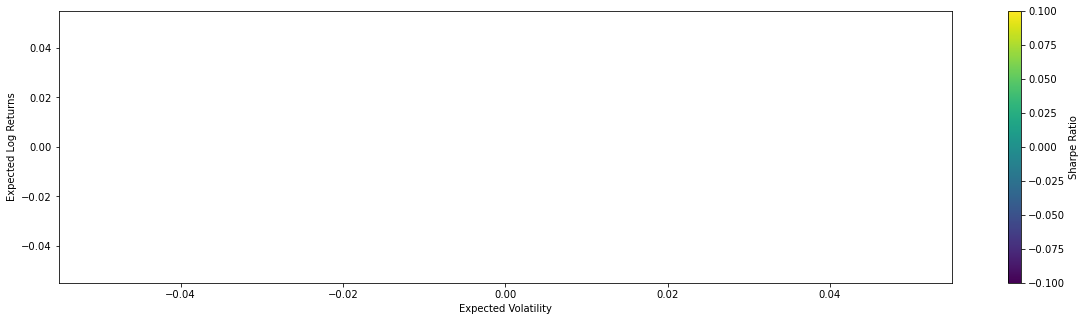

here are the smartfolio weights:          0         1       2         3         4
0  0.133946  0.314971  0.3551  0.017025  0.178958


In [24]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
plt.scatter(expected_volatility,expected_return,c=sharpe_ratio)
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Log Returns')
plt.colorbar(label='Sharpe Ratio')
plt.scatter(expected_volatility[max_index], expected_return[max_index], c='red')
plt.show()
print(f'here are the smartfolio weights:{smartfolio_weights}')

In [25]:
import itertools
from itertools import product
from MCForecastTools import MCSimulation
%matplotlib inline

DEBUG:matplotlib.pyplot:Loaded backend module://matplotlib_inline.backend_inline version unknown.


In [26]:
mcsims_df = pd.DataFrame()
for final_cryptos in crypataras_picks:
    mcsims = tv.get_hist(symbol=final_cryptos,
                       exchange=exchange,
                       interval=Interval.in_daily,
                       n_bars=bars)
    mcsims_df = mcsims_df.append(mcsims)

DEBUG:root:creating websocket connection
DEBUG:tvDatafeed.main:getting data for BINANCE:TRXXRP...
DEBUG:root:creating websocket connection
DEBUG:tvDatafeed.main:getting data for BINANCE:NMRBNB...
DEBUG:root:creating websocket connection
DEBUG:tvDatafeed.main:getting data for BINANCE:POLSBNB...
DEBUG:root:creating websocket connection
DEBUG:tvDatafeed.main:getting data for BINANCE:GLMBTC...
DEBUG:root:creating websocket connection
DEBUG:tvDatafeed.main:getting data for BINANCE:DASHBTC...


In [27]:
mcsims_df

symbol      open      high       low     close  \
datetime                                                                       
2021-06-13 19:00:00   BINANCE:TRXXRP  0.080800  0.081620  0.078150  0.080790   
2021-06-14 19:00:00   BINANCE:TRXXRP  0.080910  0.082840  0.080500  0.082580   
2021-06-15 19:00:00   BINANCE:TRXXRP  0.082610  0.083900  0.082130  0.082950   
2021-06-16 19:00:00   BINANCE:TRXXRP  0.082900  0.087850  0.081740  0.087660   
2021-06-17 19:00:00   BINANCE:TRXXRP  0.087650  0.089100  0.085790  0.087090   
...                              ...       ...       ...       ...       ...   
2021-09-16 19:00:00  BINANCE:DASHBTC  0.004361  0.004365  0.004154  0.004212   
2021-09-17 19:00:00  BINANCE:DASHBTC  0.004212  0.004283  0.004115  0.004125   
2021-09-18 19:00:00  BINANCE:DASHBTC  0.004131  0.004179  0.004061  0.004080   
2021-09-19 19:00:00  BINANCE:DASHBTC  0.004085  0.004148  0.003909  0.003954   
2021-09-20 19:00:00  BINANCE:DASHBTC  0.003954  0.004023  0.003907  0.004008   

                           volume  
datetime                           
2021-06-13 19:00:00  3.711875e+06  
2021-06-14 19:00:00  5.602078e+06  
2021-06-15 19:00:00  4.444620e+06  
2021-06-16 19:00:00  1.200538e+07  
2021-06-17 19:00:00  1.003809e+07  
...                           ...  
2021-09-16 19:00:00  1.271748e+04  
2021-09-17 19:00:00  1.046008e+04  
2021-09-18 19:00:00  9.096226e+03  
2021-09-19 19:00:00  2.547340e+04  
2021-09-20 19:00:00  3.080198e+03  

[500 rows x 6 columns]

In [28]:
ticker1_df = mcsims_df.loc[mcsims_df.symbol==f'{exchange}' + ':' +f'{crypataras_picks[0]}']
ticker2_df = mcsims_df.loc[mcsims_df.symbol==f'{exchange}' + ':' +f'{crypataras_picks[1]}']
ticker3_df = mcsims_df.loc[mcsims_df.symbol==f'{exchange}' + ':' +f'{crypataras_picks[2]}']
ticker4_df = mcsims_df.loc[mcsims_df.symbol==f'{exchange}' + ':' +f'{crypataras_picks[3]}']
ticker5_df = mcsims_df.loc[mcsims_df.symbol==f'{exchange}' + ':' +f'{crypataras_picks[4]}']
sim_data = pd.concat([ticker1_df, ticker2_df, ticker3_df, ticker4_df, ticker5_df], axis='columns', join='inner')

mcsims_df.to_csv('updated_delete.csv')

In [29]:
mdex = itertools.product(crypataras_picks, ticker1_df.columns)
columns = []
for x in mdex:
 columns.append(x)
sim_data.columns = pd.MultiIndex.from_tuples(columns) 

In [30]:
smartfolio_weights

0         1       2         3         4
0  0.133946  0.314971  0.3551  0.017025  0.178958

In [ ]:
# possible format for mc_weights
smart_weights =[smartfolio_weights[0],smartfolio_weights[1],smartfolio_weights[2],smartfolio_weights[3],smartfolio_weights[4]]
#weights = smart_weights

In [31]:
# you can set weights = smart_weights, reference cell above

MC_even_dist = MCSimulation(
    portfolio_data = sim_data, 
    weights = [.20, .20, .20, .20, .20],
    num_simulation=100,
    num_trading_days = 126
)


In [36]:
cumula_return = MC_even_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.


In [37]:
cumula_return.to_csv('mc_df.csv')

In [44]:
type(simulated_returns_data)

dict

In [47]:
simulated_returns_data = {
    "mean": list(MC_even_dist.simulated_return.mean(axis=1)),
    "median": list(MC_even_dist.simulated_return.median(axis=1)),
    "min": list(MC_even_dist.simulated_return.min(axis=1)),
    "max": list(MC_even_dist.simulated_return.max(axis=1))
}

In [48]:
df_simulated_returns = pd.DataFrame(simulated_returns_data)

In [49]:
df_simulated_returns.head()

mean    median       min       max
0  1.000000  1.000000  1.000000  1.000000
1  1.005499  1.007245  0.962330  1.051321
2  1.012825  1.014455  0.955387  1.099967
3  1.013635  1.012581  0.934940  1.117652
4  1.012348  1.014507  0.923690  1.127782

In [50]:
df_simulated_returns.to_csv('mc_stats.csv')

In [3]:
import panel as pn
pn.extension('plotly')
from panel.interact import interact
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import iplot
from plotly.subplots import make_subplots
from panel import widgets


import pandas as pd
import os
from pathlib import Path
from dotenv import load_dotenv

import warnings
warnings.filterwarnings('ignore')

In [4]:
mcs_path = Path("mc_df.csv")
mc_df = pd.read_csv(mcs_path, index_col=[0])
mc_df.index.name="Days"
mc_df.head(30)

0         1         2         3         4         5         6  \
Days                                                                         
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1     0.994033  1.010529  1.043141  0.996445  1.027777  1.013984  1.025090   
2     1.033172  1.016625  1.049156  0.979137  1.000127  1.065823  1.037060   
3     1.025191  1.018004  1.044278  1.002497  0.981353  1.075257  1.015966   
4     1.014631  1.013190  1.005425  0.984790  0.980470  1.060488  0.995448   
5     1.020284  1.007765  1.020785  0.983248  0.963476  1.051992  0.964803   
6     1.021328  1.004904  1.011185  0.965686  0.995428  1.048104  0.993438   
7     1.017319  1.024004  1.002588  0.971292  1.026143  1.038272  1.018395   
8     1.028072  1.052280  0.971466  0.979529  1.026140  1.107881  1.012421   
9     1.039417  1.045644  0.964366  0.981757  1.064901  1.110989  1.028530   
10    1.013418  1.079555  0.965473  0.995687  1.054623  1.124002  1.025004   
11    1.037078  1.078085  0.968595  1.001828  1.050076  1.138365  1.028100   
12    1.060799  1.082089  0.967712  0.996716  1.059437  1.118127  1.045278   
13    1.047960  1.077830  0.962007  1.028837  1.054936  1.097164  1.062872   
14    1.072457  1.105504  0.959842  1.041336  1.042761  1.126512  1.062187   
15    1.070164  1.159216  0.955574  1.034733  1.048595  1.110892  1.037210   
16    1.068231  1.133623  0.915520  1.050800  1.057167  1.135100  1.004847   
17    1.077400  1.143267  0.889311  1.091110  1.028190  1.124235  0.958330   
18    1.045154  1.128086  0.887616  1.068688  1.039095  1.129103  0.964718   
19    1.019815  1.150759  0.895454  1.080645  1.045509  1.103653  0.961189   
20    0.968232  1.145776  0.897311  1.108008  1.041610  1.137888  0.953753   
21    0.975577  1.177088  0.917134  1.123272  1.071770  1.113157  0.935567   
22    0.962929  1.136587  0.937450  1.126353  1.085790  1.136207  0.927721   
23    0.959761  1.134759  0.928688  1.132514  1.098008  1.122845  0.980868   
24    0.949046  1.184003  0.908162  1.071167  1.087493  1.126647  0.957341   
25    0.942588  1.190797  0.920824  1.034859  1.081536  1.131425  0.946190   
26    0.959069  1.215674  0.911077  1.093356  1.072698  1.163719  0.921513   
27    0.966541  1.194886  0.910563  1.099677  1.058353  1.158120  0.939727   
28    0.973885  1.212296  0.889141  1.115252  1.086516  1.167883  0.921447   
29    0.917232  1.214115  0.887929  1.119203  1.119411  1.186532  0.946442   

             7         8         9  ...        90        91        92  \
Days                                ...                                 
0     1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000   
1     0.979195  0.993745  1.020128  ...  0.992781  1.028213  0.989206   
2     1.000340  1.021162  1.028053  ...  0.993771  1.033912  0.979681   
3     0.996303  1.036956  1.027148  ...  0.964738  1.063132  0.970004   
4     1.012729  1.029496  1.036729  ...  0.991771  1.042589  0.955095   
5     1.055356  1.013140  0.996428  ...  0.996158  1.040237  0.947884   
6     1.080162  0.990732  0.973561  ...  1.003953  1.057494  0.980542   
7     1.108102  1.009954  0.946763  ...  1.051514  1.091353  1.003388   
8     1.120068  1.022214  0.928457  ...  1.022861  1.123642  1.043354   
9     1.168420  0.980752  0.923208  ...  1.049344  1.111566  1.040774   
10    1.149033  0.952583  0.887434  ...  1.014612  1.127573  1.044063   
11    1.156767  0.958962  0.886078  ...  1.006956  1.140603  1.051021   
12    1.185415  0.950656  0.869241  ...  0.997002  1.154502  1.050825   
13    1.137254  0.973975  0.861798  ...  0.981958  1.132547  1.038806   
14    1.102795  0.931492  0.859348  ...  0.969448  1.134551  1.021944   
15    1.145130  0.949853  0.868096  ...  0.962171  1.102061  1.073073   
16    1.162381  0.983816  0.893541  ...  0.928394  1.131667  1.046702   
17    1.186580  0.972288  0.890883  ...  0.909862  1.100585  1.064222   
18    1.192703  0.997329  0.883099  ...  0.923737  1.064

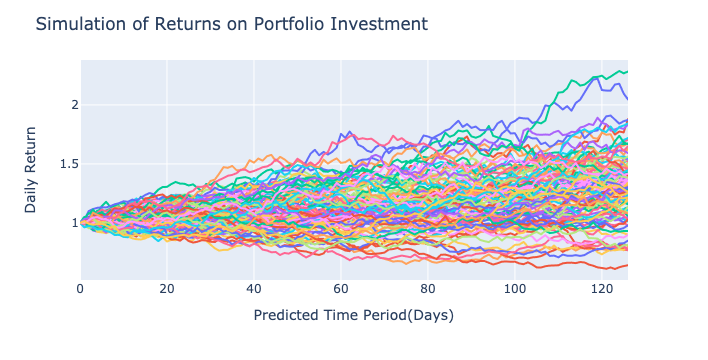

In [5]:
fig1 = px.line(mc_df)
fig1 = fig1.update_layout(
    xaxis_title="Predicted Time Period(Days)",
    yaxis_title="Daily Return",
    showlegend=False,
    title='Simulation of Returns on Portfolio Investment')
fig1.show()

In [6]:
#use dataframe of stats for daily returns of simulation from aarons part as well
mc_path = Path("mc_stats.csv")
df_simulated_returns = pd.read_csv(mc_path, index_col=[0])
df_simulated_returns.index.name="Days"
df_simulated_returns


mean    median       min       max
Days                                        
0     1.000000  1.000000  1.000000  1.000000
1     1.005499  1.007245  0.962330  1.051321
2     1.012825  1.014455  0.955387  1.099967
3     1.013635  1.012581  0.934940  1.117652
4     1.012348  1.014507  0.923690  1.127782
...        ...       ...       ...       ...
122   1.286114  1.303238  0.622253  2.239912
123   1.288846  1.301703  0.609139  2.264397
124   1.294270  1.300172  0.623883  2.287630
125   1.294595  1.292377  0.633936  2.267609
126   1.302788  1.308823  0.640844  2.283284

[127 rows x 4 columns]

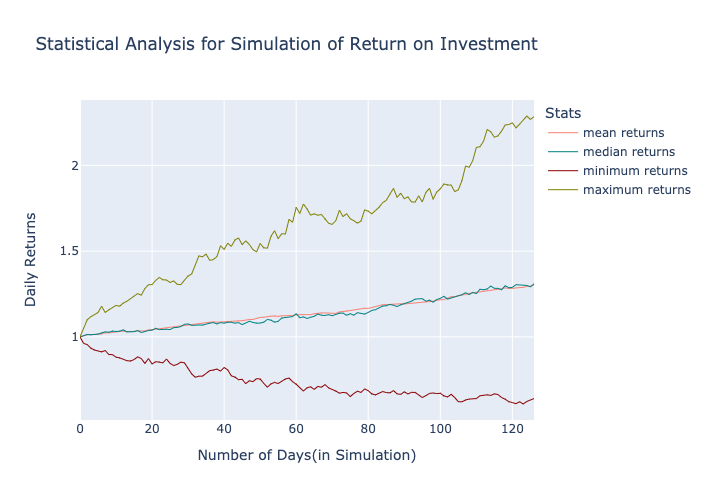

In [7]:
fig2 = go.Figure()
fig2.add_trace(go.Scatter(x=df_simulated_returns.index, y=df_simulated_returns['mean'],
                    mode='lines',
                    name='mean returns',
                    line=dict(color="salmon", width=1),))
fig2.add_trace(go.Scatter(x=df_simulated_returns.index, y=df_simulated_returns['median'],
                    mode='lines',
                    name='median returns',
                    line=dict(color="teal", width=1),))
fig2.add_trace(go.Scatter(x=df_simulated_returns.index, y=df_simulated_returns['min'],
                    mode='lines',
                    name='minimum returns',
                    line=dict(color="darkred", width=1),))
fig2.add_trace(go.Scatter(x=df_simulated_returns.index, y=df_simulated_returns['max'],
                    mode='lines',
                    name='maximum returns',
                    line=dict(color="olive", width=1),))
fig2.update_layout(
    height=500,
    width=1200,
    xaxis_title="Number of Days(in Simulation)",
    yaxis_title="Daily Returns",
    legend_title="Stats",
    title="Statistical Analysis for Simulation of Return on Investment")
fig2.show()

In [8]:
# Set initial investment
initial_investment = 11999

# Multiply an initial investment by the daily returns of simulative stock prices to return the progression of daily returns in terms of money
cumulative_pnl = initial_investment * df_simulated_returns

# Display sample data
cumulative_pnl.head()

mean        median           min           max
Days                                                        
0     11999.000000  11999.000000  11999.000000  11999.000000
1     12064.983860  12085.927790  11546.993196  12614.796960
2     12152.891460  12172.441832  11463.694584  13198.503235
3     12162.612084  12149.954640  11218.345314  13410.701577
4     12147.157686  12173.074122  11083.360862  13532.257403

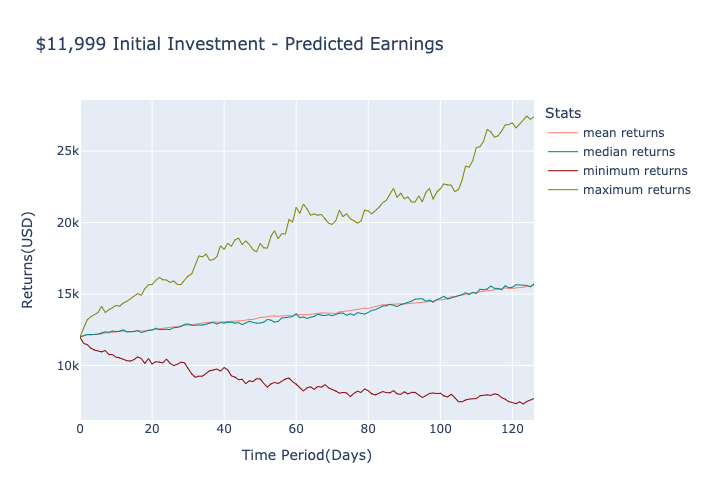

You've chosen to invest $11,900 in a diverse cryptocurrency portfolio!
This simulation can help you visualize what your portfolio may look like in the days following your initial investment.
Let's take a look at some other coins that are popularly traded right now.


In [9]:
#Plot simulated investment portfolio returns with initial investment number (values are in USD)
fig3 = go.Figure()
fig3 = fig3.add_trace(go.Scatter(x=cumulative_pnl.index, y=cumulative_pnl['mean'],
                    mode='lines',
                    name='mean returns',
                    line=dict(color="salmon", width=1),))
fig3 = fig3.add_trace(go.Scatter(x=cumulative_pnl.index, y=cumulative_pnl['median'],
                    mode='lines',
                    name='median returns',
                    line=dict(color="teal", width=1),))
fig3 = fig3.add_trace(go.Scatter(x=cumulative_pnl.index, y=cumulative_pnl['min'],
                    mode='lines',
                    name='minimum returns',
                    line=dict(color="darkred", width=1),))
fig3 = fig3.add_trace(go.Scatter(x=cumulative_pnl.index, y=cumulative_pnl['max'],
                    mode='lines',
                    name='maximum returns',
                    line=dict(color="olive", width=1),))
fig3 = fig3.update_layout(
    height=500,
    width=1200,
    xaxis_title="Time Period(Days)",
    yaxis_title="Returns(USD)",
    legend_title="Stats",
    title="$11,999 Initial Investment - Predicted Earnings")
fig3.show()

print("You've chosen to invest $11,900 in a diverse cryptocurrency portfolio!")
print("This simulation can help you visualize what your portfolio may look like in the days following your initial investment.")
print("Let's take a look at some other coins that are popularly traded right now.")


In [ ]:
# # CAN ONLY RUN IN TRADING VIEW ENV
# #--------------------------
# # ticker list for candlestick and RSI general visualizations
# # does not need to be cryptara's picks!

# tickers=['COMPUSD','SUSHIUSD','LTCUSD','ETCUSD','DOGEUSD','STORJUSD','ADAUSD','BTCUSD','ETHUSD','SOLUSD','UNIUSD']

# #set variables
# my_crypto_portfolio = tickers
# df_daily = pd.DataFrame()
# exchange = 'COINBASE',

# #create for loop to append each ticker into dataframe
# for ticker in my_crypto_portfolio:
#     data = tv.get_hist(
#         symbol=ticker,
#         exchange=exchange,
#         interval=Interval.in_daily,n_bars=1000)
#     df_daily = df_daily.append(data)
    
    
# #adjust index from datetime to date to remove timestamp
# df_daily.index = pd.to_datetime(df_daily.index, errors='coerce').date

# #divide volume by 1,000,000 to convert Volume to V(millions)
# df_daily['volume'] = (df_daily['volume'].astype(float)/1000).round(4).astype(float)
# df_daily.to_csv('daily_ohlc.csv')

In [ ]:
#read in COINBASE ticker dataframe
daily_path = Path("daily_ohlc.csv")
df_daily = pd.read_csv(daily_path, index_col=[0])
df_daily.index.name = "Date"

In [10]:


#.loc COINBASE tickers Symbol, Open, High, Low, Close, Volume data as new df
comp_df = df_daily.loc[df_daily.symbol=='COINBASE:COMPUSD']
sushi_df = df_daily.loc[df_daily.symbol=='COINBASE:SUSHIUSD']
ltc_df = df_daily.loc[df_daily.symbol=='COINBASE:LTCUSD']
etc_df = df_daily.loc[df_daily.symbol=='COINBASE:ETCUSD']
doge_df = df_daily.loc[df_daily.symbol=='COINBASE:DOGEUSD']
storj_df = df_daily.loc[df_daily.symbol=='COINBASE:STORJUSD']
ada_df = df_daily.loc[df_daily.symbol=='COINBASE:ADAUSD']
btc_df = df_daily.loc[df_daily.symbol=='COINBASE:BTCUSD']
eth_df = df_daily.loc[df_daily.symbol=='COINBASE:ETHUSD']
sol_df = df_daily.loc[df_daily.symbol=='COINBASE:SOLUSD']
uni_df = df_daily.loc[df_daily.symbol=='COINBASE:UNIUSD']

#reset COINBASE ticker index to prep for plotting candlestick RSI
comp_df=comp_df.tail(60).reset_index()
sushi_df=sushi_df.tail(60).reset_index()
ltc_df=ltc_df.tail(60).reset_index()
etc_df=etc_df.tail(60).reset_index()
doge_df=doge_df.tail(60).reset_index()
storj_df=storj_df.tail(60).reset_index()
ada_df=ada_df.tail(60).reset_index()
btc_df=btc_df.tail(60).reset_index()
eth_df=eth_df.tail(60).reset_index()
sol_df=sol_df.tail(60).reset_index()
uni_df=uni_df.tail(60).reset_index()

In [27]:

print("When current price falls below the 'lower-bb' we can expect prices to begin to rise - this indicates a good BUY opportunity.") 
print("When current price raises above the 'upper-bb' we can expect prices to begin to fall soon - this presents an opportunity to SELL.")

# calculate sma and std for upper and lower bb for each df in df_list
df_list = [comp_df, sushi_df, ltc_df, etc_df, doge_df, storj_df, ada_df, btc_df, eth_df, sol_df, uni_df]
WINDOW=30

for df in df_list:
    df['sma'] = df['close'].rolling(WINDOW).mean()
    df['std'] = df['close'].rolling(WINDOW).std(ddof = 0)
    
    
    # Create subplots with 2 rows; top for candlestick price, and bottom for bar volume
    fig = make_subplots(rows = 2, cols = 1, shared_xaxes = True, subplot_titles = (f'{df.symbol[0]} Relative Strength Index', 'Volume(MM)'), vertical_spacing = 0.1, row_width = [.5, 1.4])

# Candlestick Plot
    fig.add_trace(go.Candlestick(x = df['Date'],
                                 open = df['open'],
                                 high = df['high'],
                                 low = df['low'],
                                 close = df['close'], showlegend=False,
                                 increasing_line_color= 'olive', decreasing_line_color= 'darkred',
                                 name = 'candlestick'),
                  row = 1, col = 1)

# Moving Average
    fig.add_trace(go.Scatter(x = df['Date'],
                             y = df['sma'],
                             line_color = 'black',
                             name = 'sma'),
                  row = 1, col = 1)
    
# Upper Bound
    fig.add_trace(go.Scatter(x = df['Date'],
                             y = df['sma'] + (df['std'] * 2),
                             line_color = 'tan',
                             line = {'dash': 'dash'},
                             name = 'upper band',
                             opacity = 0.5),
                  row = 1, col = 1) 
# Lower Bound fill in between with parameter 'fill': 'tonexty'
    fig.add_trace(go.Scatter(x = df['Date'],
                             y = df['sma'] - (df['std'] * 2),
                             line_color = 'tan',
                             line = {'dash': 'dash'},
                             fill = 'tonexty',
                             name = 'lower band',
                             opacity = 0.5),
                  row = 1, col = 1)

# Labels & Titles
    fig.update_layout(
        height=500,
        width=1200,
        xaxis_title=None,
        yaxis_title="Price",
        legend_title="Indicators",
        )
# ----------------

# Volume Plot
    fig.add_trace(go.Bar(x = df['Date'], y = df['volume'], showlegend=False), 
              row = 2, col = 1)
# Remove range slider; (short time frame)
    fig.update(layout_xaxis_rangeslider_visible=True)

#comment out fig.show() if you dont want it to load all 11 charts ->
    fig.show();    
   


When current price falls below the 'lower-bb' we can expect prices to begin to rise - this indicates a good BUY opportunity.
When current price raises above the 'upper-bb' we can expect prices to begin to fall soon - this presents an opportunity to SELL.


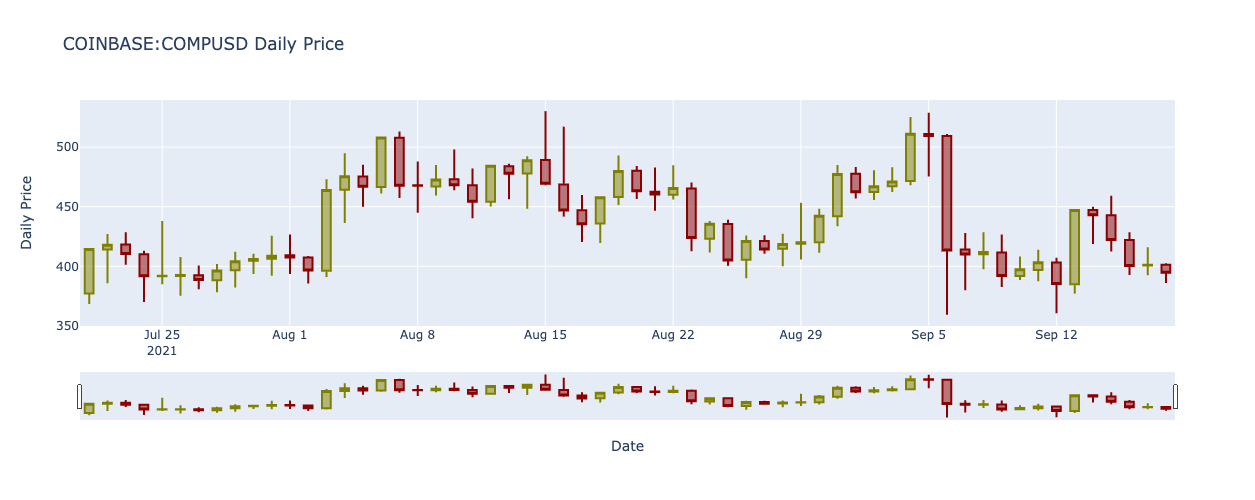

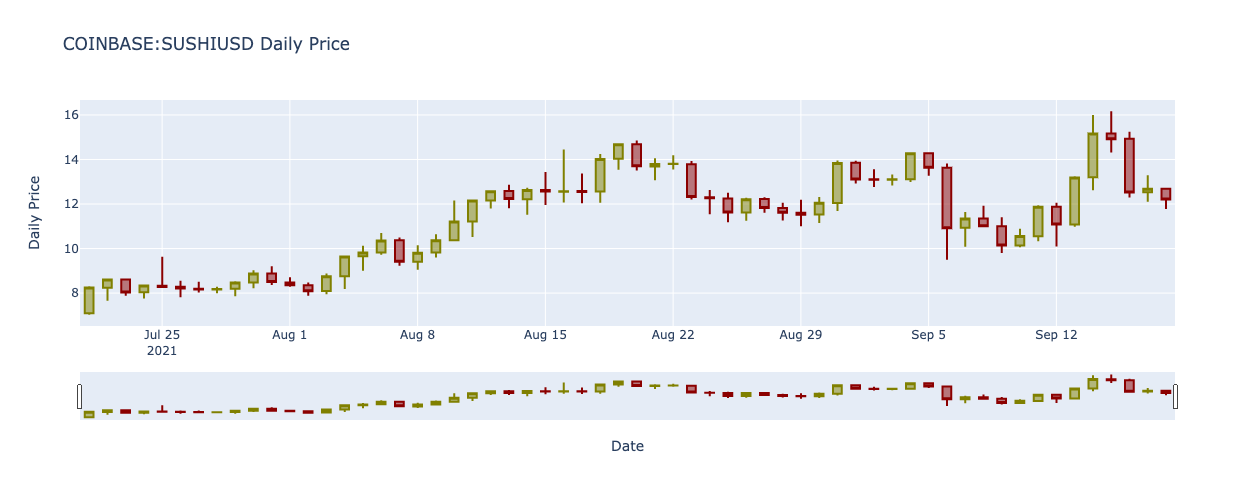

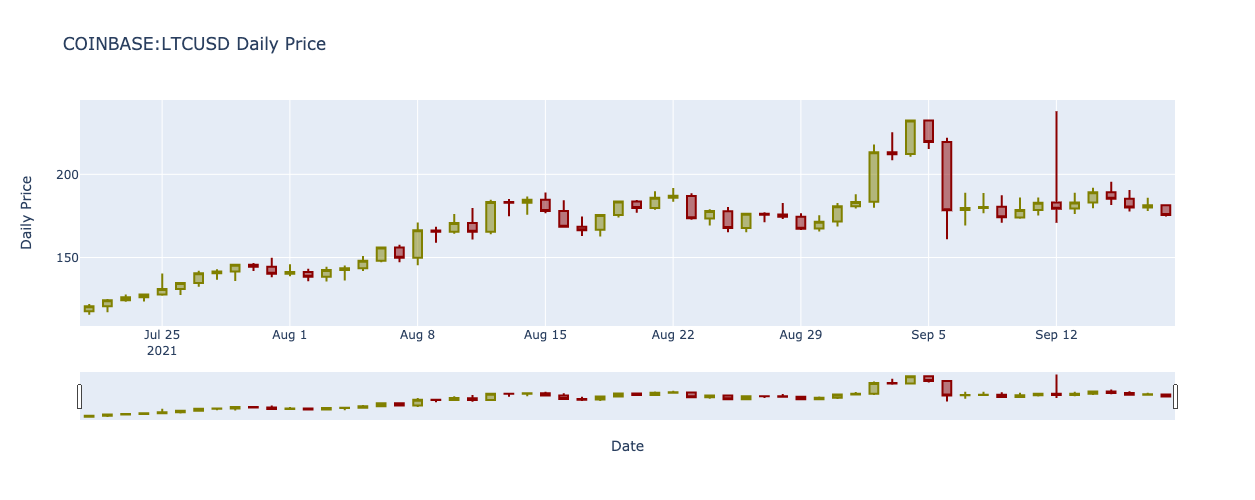

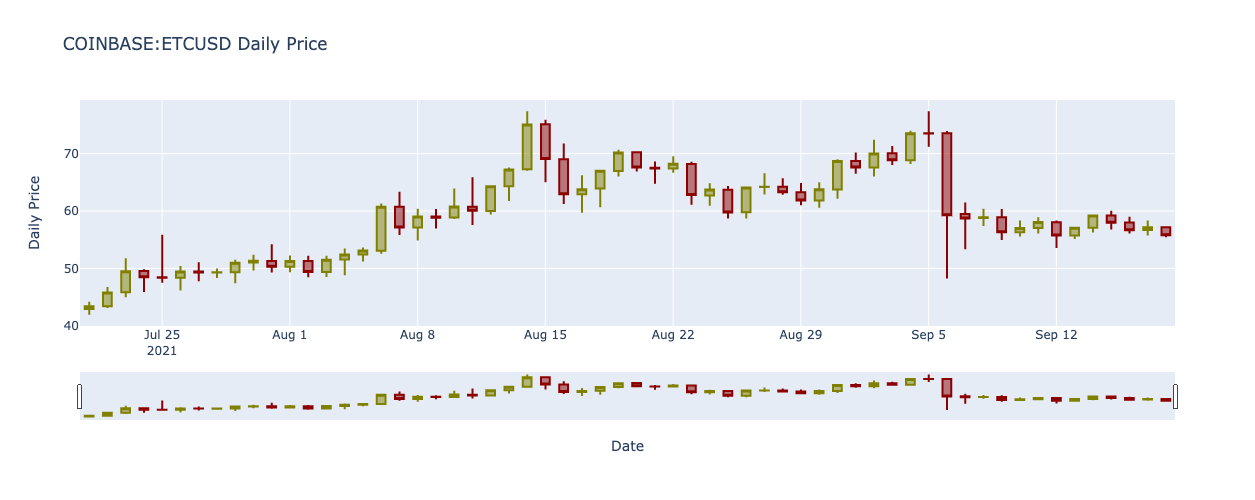

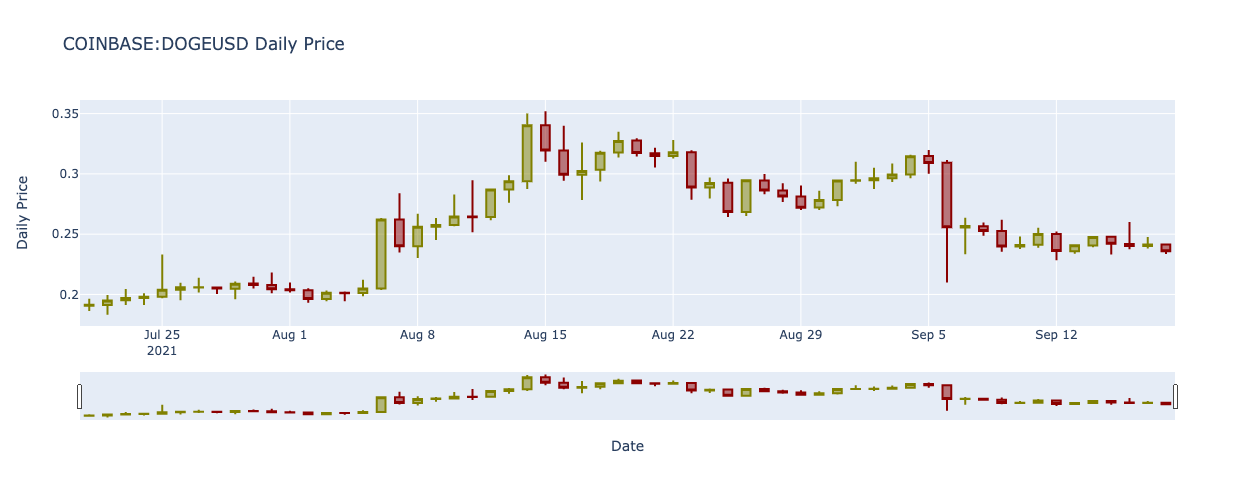

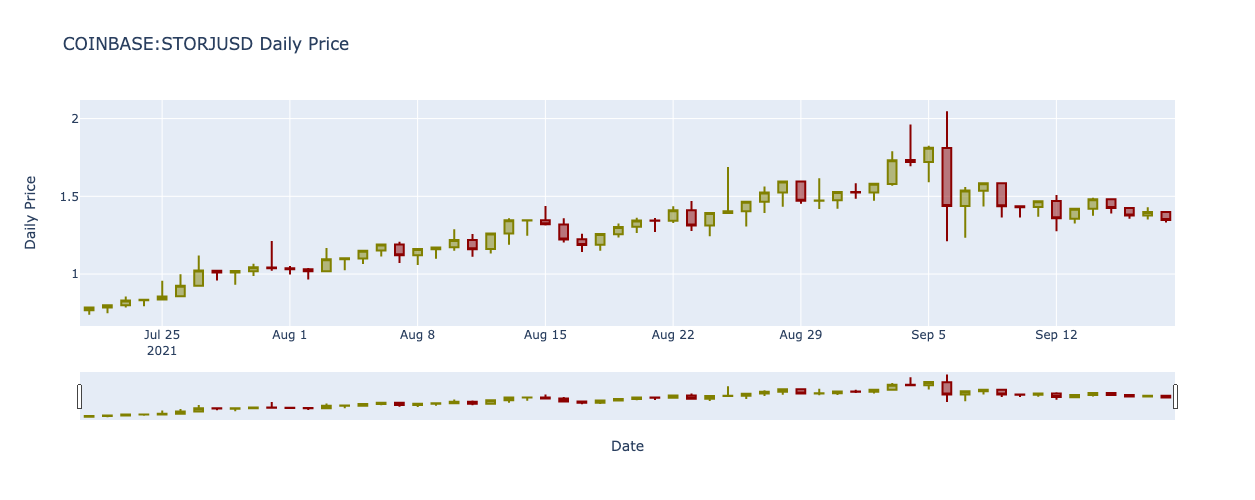

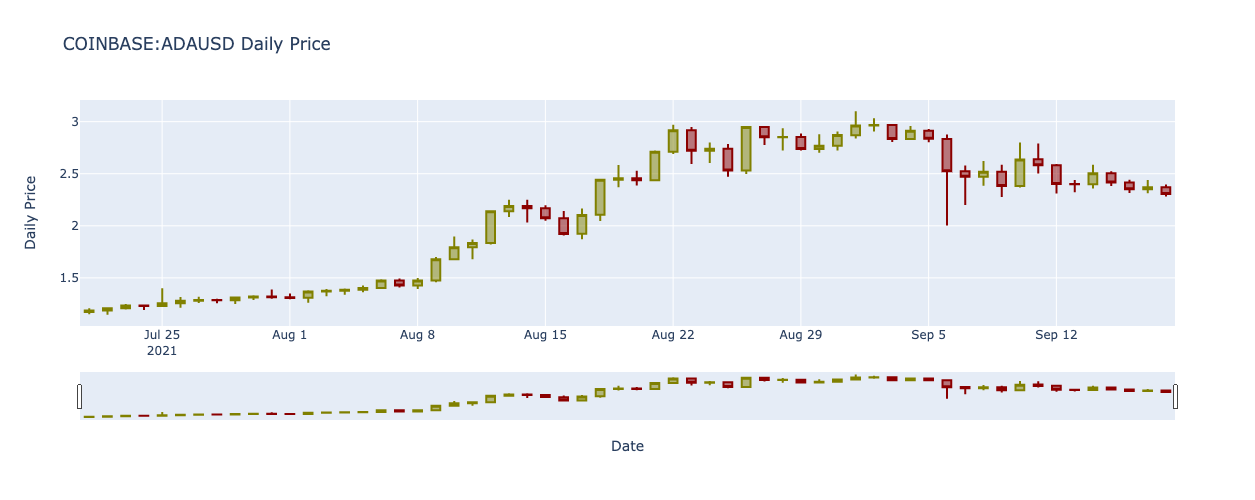

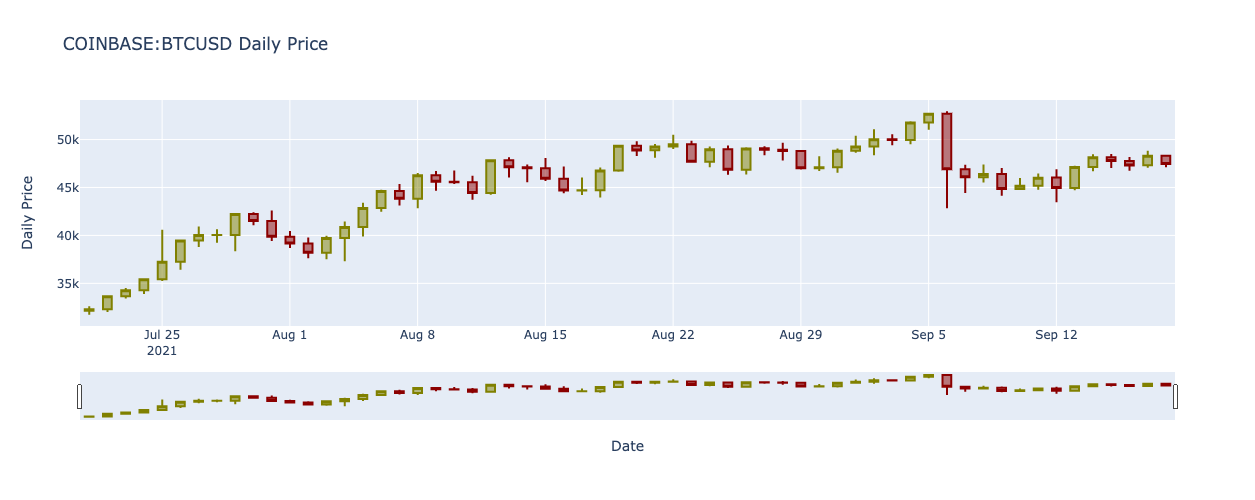

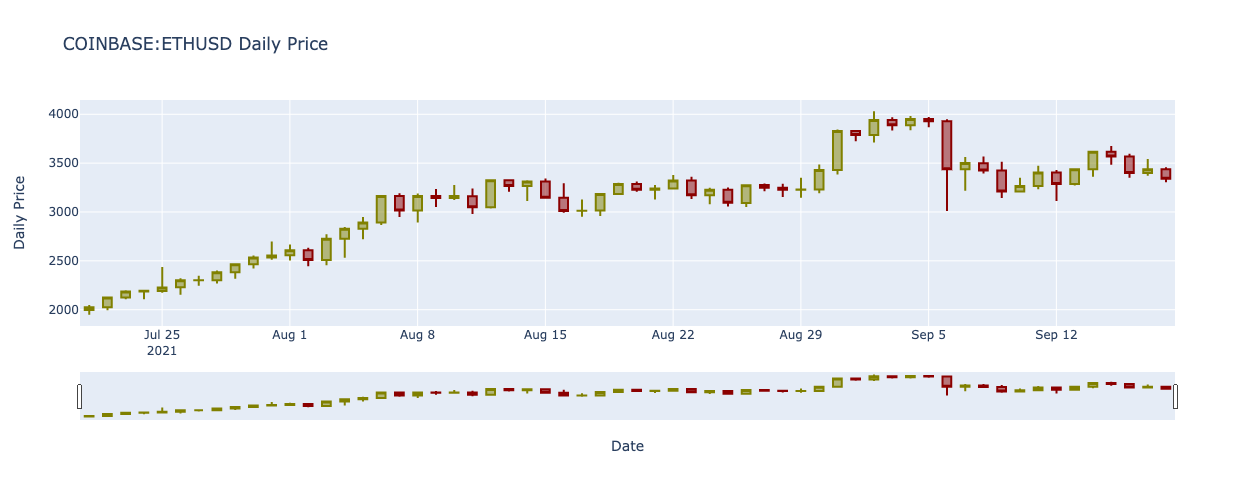

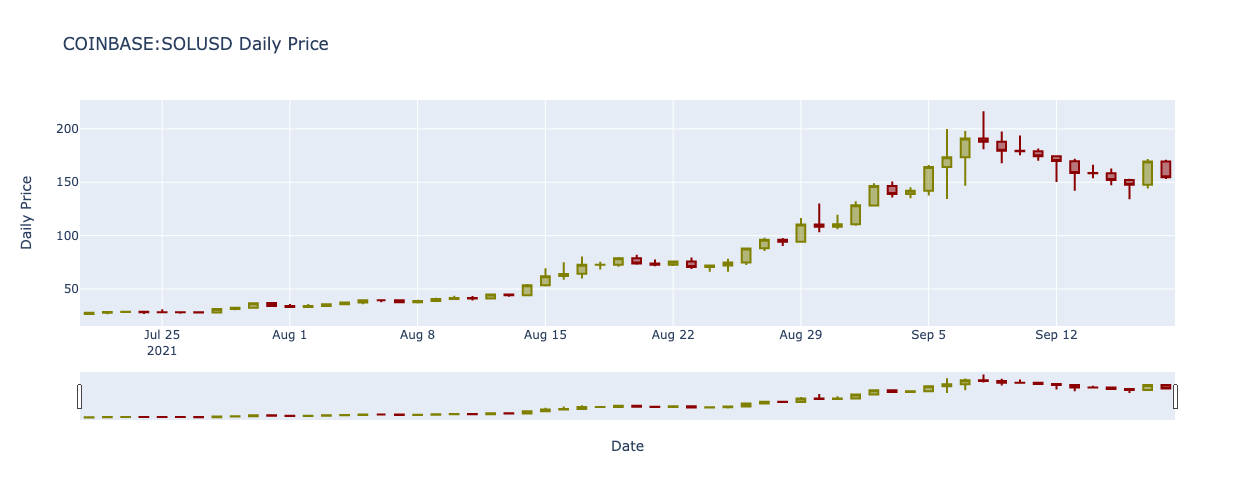

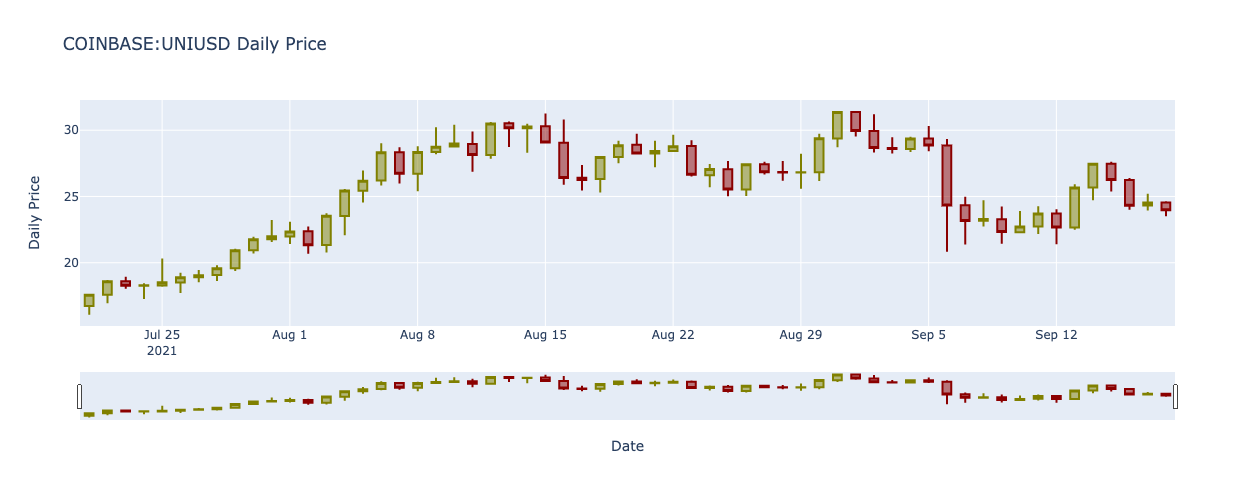

In [14]:
#candlestick charts
df_list = [comp_df, sushi_df, ltc_df, etc_df, doge_df, storj_df, ada_df, btc_df, eth_df, sol_df, uni_df]

for df in df_list:
    fig = go.Figure(
    data=[
        go.Candlestick(x=df['Date'],
                       open=df['open'],
                       high=df['high'],
                       low=df['low'],
                       close=df['close'],
                       increasing_line_color= 'olive', decreasing_line_color= 'darkred')
        
    ])
    fig.update(layout_xaxis_rangeslider_visible=True)
    fig.update_layout(
        height=500,
        width=1200,
        title=f'{df.symbol[0]} Daily Price',
        xaxis_title='Date',
        yaxis_title='Daily Price')
    #comment out fig.show() if you dont want 11 charts to show
    fig.show()


In [29]:
# dashboard components
# code from the plots above can be commented out at the very end once everything is working

# mcsftool plot simulation (120) = fig1
fig1 = px.line(mc_df)
fig1 = fig1.update_layout(
    xaxis_title="Predicted Time Period(Days)",
    yaxis_title="Daily Return",
    showlegend=False,
    title='Simulation of Returns on Portfolio Investment')

#-------------end plot 1----------------

#stat plot = fig2
fig2 = go.Figure()
fig2 = fig2.add_trace(go.Scatter(x=df_simulated_returns.index, y=df_simulated_returns['mean'],
                    mode='lines',
                    name='mean returns',
                    line=dict(color="salmon", width=1),))
fig2 =fig2.add_trace(go.Scatter(x=df_simulated_returns.index, y=df_simulated_returns['median'],
                    mode='lines',
                    name='median returns',
                    line=dict(color="teal", width=1),))
fig2 =fig2.add_trace(go.Scatter(x=df_simulated_returns.index, y=df_simulated_returns['min'],
                    mode='lines',
                    name='minimum returns',
                    line=dict(color="darkred", width=1),))
fig2 =fig2.add_trace(go.Scatter(x=df_simulated_returns.index, y=df_simulated_returns['max'],
                    mode='lines',
                    name='maximum returns',
                    line=dict(color="olive", width=1),))
fig2 =fig2.update_layout(
    height=500,
    width=1200,
    xaxis_title="Number of Days(in Simulation)",
    yaxis_title="Daily Returns",
    legend_title="Stats",
    title="Statistical Analysis for Simulation of Return on Investment")

#----------------end plot 2------------------

#Plot simulated investment portfolio returns with initial investment number (values are in USD)
# investment plot = fig3
fig3 = go.Figure()
fig3 =fig3.add_trace(go.Scatter(x=cumulative_pnl.index, y=cumulative_pnl['mean'],
                    mode='lines',
                    name='mean returns',
                    line=dict(color="salmon", width=1),))
fig3 =fig3.add_trace(go.Scatter(x=cumulative_pnl.index, y=cumulative_pnl['median'],
                    mode='lines',
                    name='median returns',
                    line=dict(color="teal", width=1),))
fig3 =fig3.add_trace(go.Scatter(x=cumulative_pnl.index, y=cumulative_pnl['min'],
                    mode='lines',
                    name='minimum returns',
                    line=dict(color="darkred", width=1),))
fig3 =fig3.add_trace(go.Scatter(x=cumulative_pnl.index, y=cumulative_pnl['max'],
                    mode='lines',
                    name='maximum returns',
                    line=dict(color="olive", width=1),))
fig3 =fig3.update_layout(
    height=500,
    width=1200,
    xaxis_title="Time Period(Days)",
    yaxis_title="Returns(USD)",
    legend_title="Stats",
    title="$11,999 Initial Investment - Predicted Earnings")

#------------end plot 3-------------------

In [30]:
monte_column = pn.Column("## Monte Carlo Simulations", fig1)

In [31]:
return_stats = pn.Column("##Return Stats", fig2)

In [32]:
investment_sim = pn.Column("## Investment Predictions", fig3)

In [33]:
simulations = pn.Tabs(
    (
        "Monte Carlo Simulations",
        fig1
    ),
    (
        "Return Stats",
        fig2
    ),
    (
        "Investment Predictions",
        fig3
    )
)
#simulations

In [34]:
dashboard = pn.Tabs(
    ("Predicted Earnings",monte_column),
    ( "Return Stats",return_stats),
    ("Investment Predictions",fig3)
)

In [35]:
#should open localhost tab with dashboard components
pn.serve(dashboard)

Launching server at http://localhost:63931


In [ ]:
#next step is to try to get a separate tab each for RSI plot and Candlestick plot